# Lab | Cleaning numerical data

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Reading in data

In [3]:
path_name = 'files_for_lab/'
file_name = 'customer_value_analysis.csv'

customer_df = pd.read_csv(path_name+file_name)
customer_df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
customer_df.shape

(9134, 24)

In [6]:
#renaming column names to conform to PE8
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
#setting effective_to_date to datetime type
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

In [8]:
#checking type change
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [9]:
#check for nans
customer_df.isnull().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

There are no missing values in this dataset.

### Splitting numeric and categorical data

In [10]:
def num_cat_separation(df:pd.DataFrame)->pd.DataFrame:
    """
    Function takes as input a dataframe and outputs two dataframes: one with all the numeric columns and one with the categorical columns of the input dataframe

    Input
    df: original dataframe

    Output
    df_num: dataframe with numeric columns from the original dataframe
    df_cat: dataframe with categorical columns from the original dataframe

    """

    df_temp = df.copy()

    df_num = df_temp.select_dtypes(include = 'number')
    df_cat = df_temp.select_dtypes(include = ['object','datetime'])

    return df_num, df_cat

In [11]:
#splitting customer_df into numeric and categorical datasets
customer_num, customer_cat = num_cat_separation(customer_df)

In [12]:
customer_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [13]:
customer_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer           9134 non-null   object        
 1   state              9134 non-null   object        
 2   response           9134 non-null   object        
 3   coverage           9134 non-null   object        
 4   education          9134 non-null   object        
 5   effective_to_date  9134 non-null   datetime64[ns]
 6   employmentstatus   9134 non-null   object        
 7   gender             9134 non-null   object        
 8   location_code      9134 non-null   object        
 9   marital_status     9134 non-null   object        
 10  policy_type        9134 non-null   object        
 11  policy             9134 non-null   object        
 12  renew_offer_type   9134 non-null   object        
 13  sales_channel      9134 non-null   object        
 14  vehicle_

In [14]:
#dropping customer id column
customer_cat.drop('customer', axis=1, inplace=True)

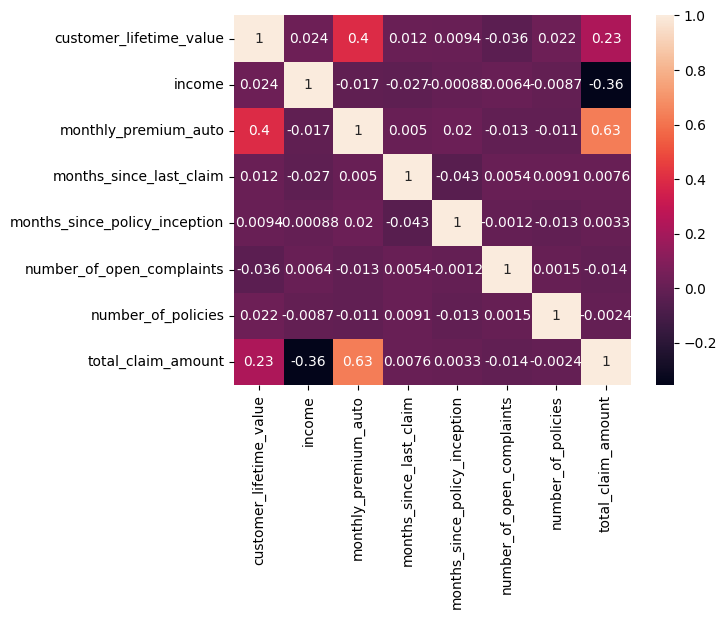

In [15]:
num_matrix = customer_num.corr()
sns.heatmap(num_matrix, annot=True)
plt.show()

#### The two columns that correlate the highest are the `monthly_premium_auto`and the `total_claim_amount` - the correlation value is 0.63. This makes sense because when you submit a claim to your insurance company, your monthly premium increases.

### Splitting numeric into continuous and discrete datasets then looking at their distributions

In [16]:
def continuous_discrete_numeric(df:pd.DataFrame, number_unique=36)->pd.DataFrame:
    """
    Takes a DataFrame with numeric only columns as input and returns two DataFrames: the first containing numeric continuous columns and the second containing numeric
    discrete columns. Continuous is defined as have more than 36 unique values.

    Input
    df: pd.DataFrame with numeric values only

    Output
    df_continuous: pd.DataFrame with numeric continuous values from the original dataset
    df_discrete: pd.DataFrame with numeric discrete values from the original dataset
    """

    df_temp = df.copy()

    continuous_cols = []
    discrete_cols = []

    #check if columns are all numeric
    if df_temp.dtypes.all() == True:
        continuous_cols = [col for col in df_temp.columns if df_temp[col].nunique()>=number_unique]
        discrete_cols = [col for col in df_temp.columns if df_temp[col].nunique()<number_unique]

    else:
        print('df does not contain only numeric values')
        

    return df_temp[continuous_cols], df_temp[discrete_cols]

In [17]:
continuous_df, discrete_df = continuous_discrete_numeric(customer_num)

In [18]:
discrete_df.head()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


In [19]:
#create barplot for the discrete values
def countplot_discrete(df:pd.DataFrame):
    """
    Creates a barplot for each column in the discrete value dataframe

    """

    df_temp = df.copy()
    
    for col in df_temp.columns:
        fig, ax = plt.subplots(figsize=(10,10))
        sns.countplot(x=df_temp[col], ax=ax)
        plt.show()
        

### Countplots of discrete variables

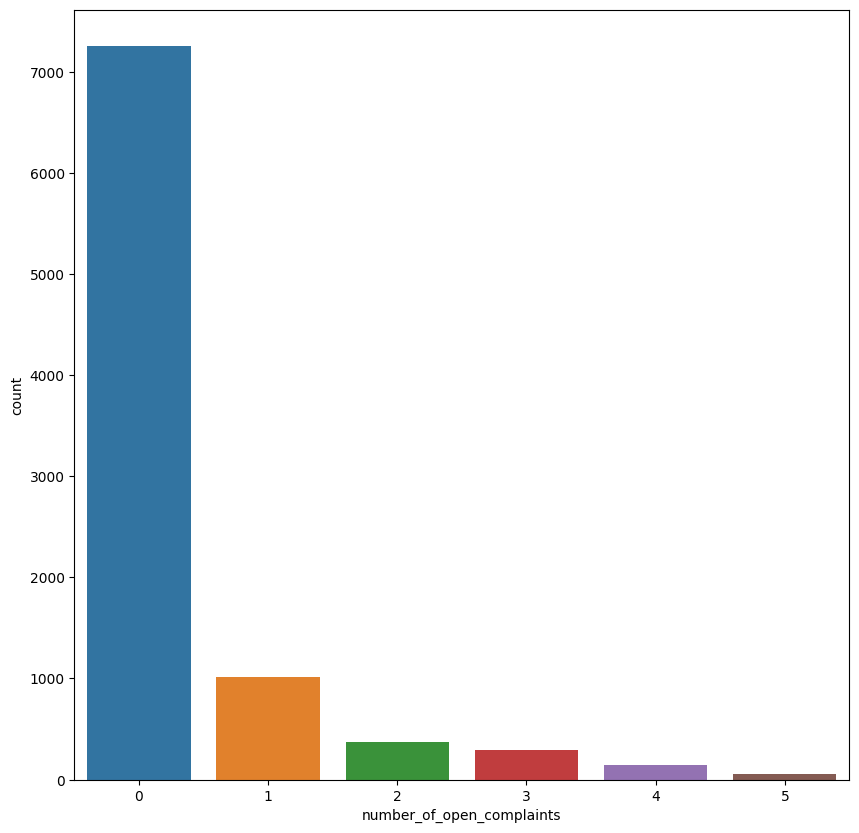

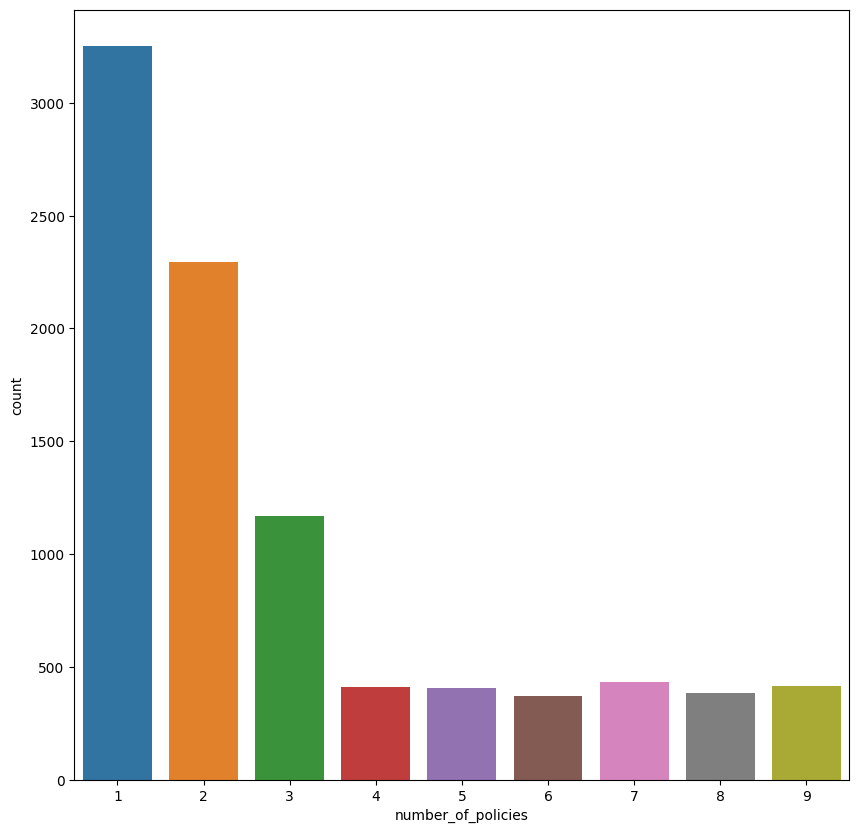

In [20]:
countplot_discrete(discrete_df)

#### The discrete data is not evenly distributed

In [21]:
def histogram_cont(df:pd.DataFrame):
    """
    Creates a histogram for each column in the dataframe
    """
    df_temp = df.copy()
    
    for col in df_temp.columns:
        fig, ax = plt.subplots(figsize=(10,10))
        sns.histplot(data=continuous_df, x=col, ax=ax)
        plt.show()
    

### Histograms of continuous variables

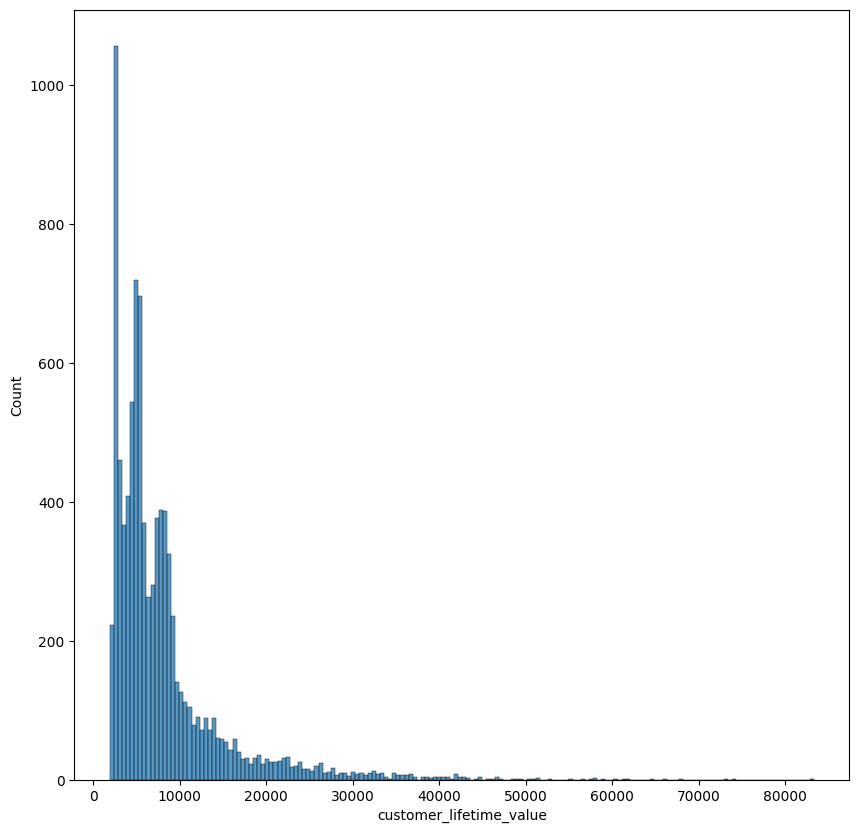

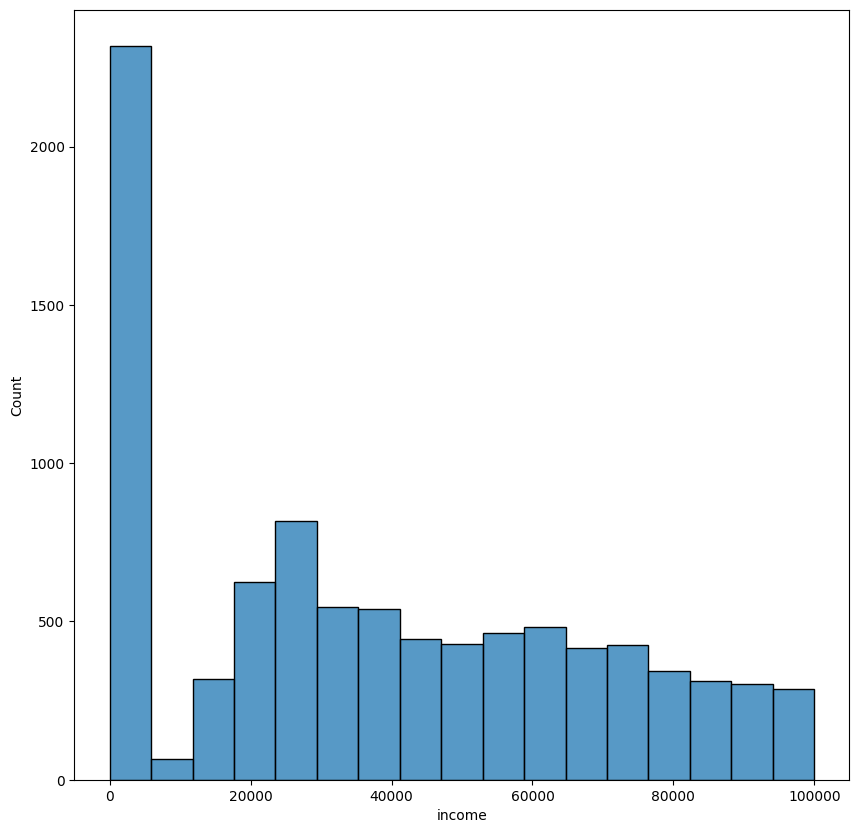

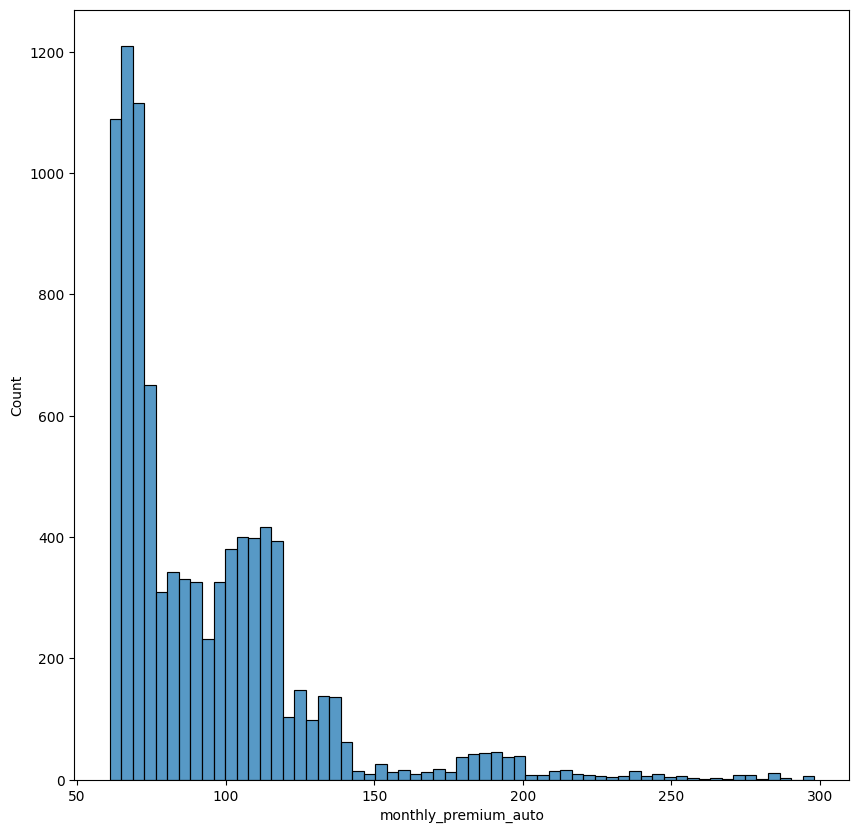

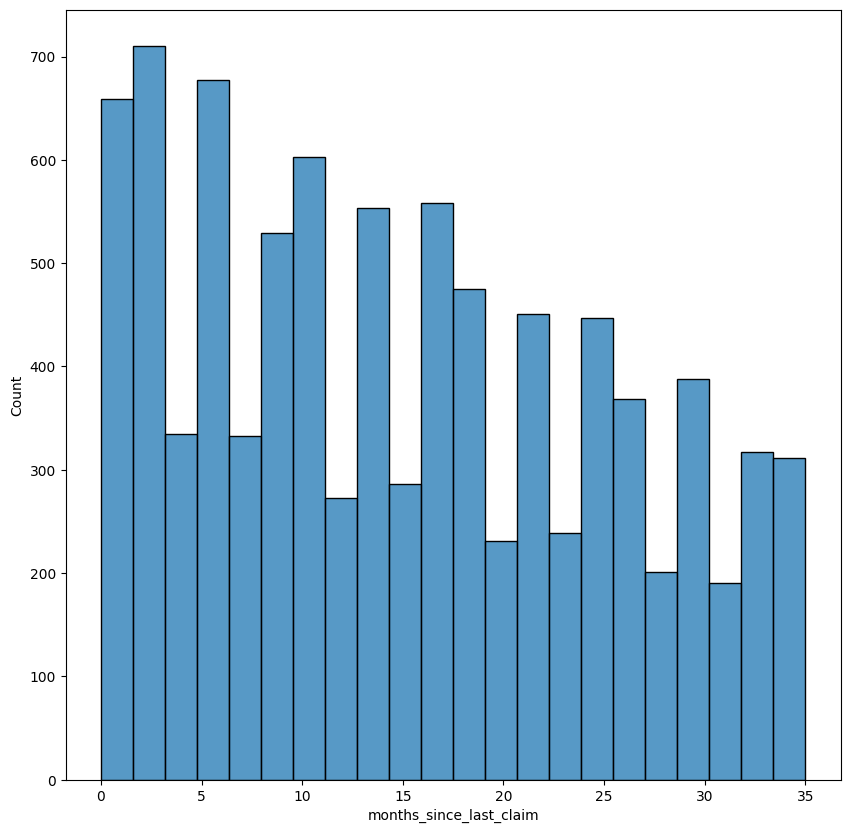

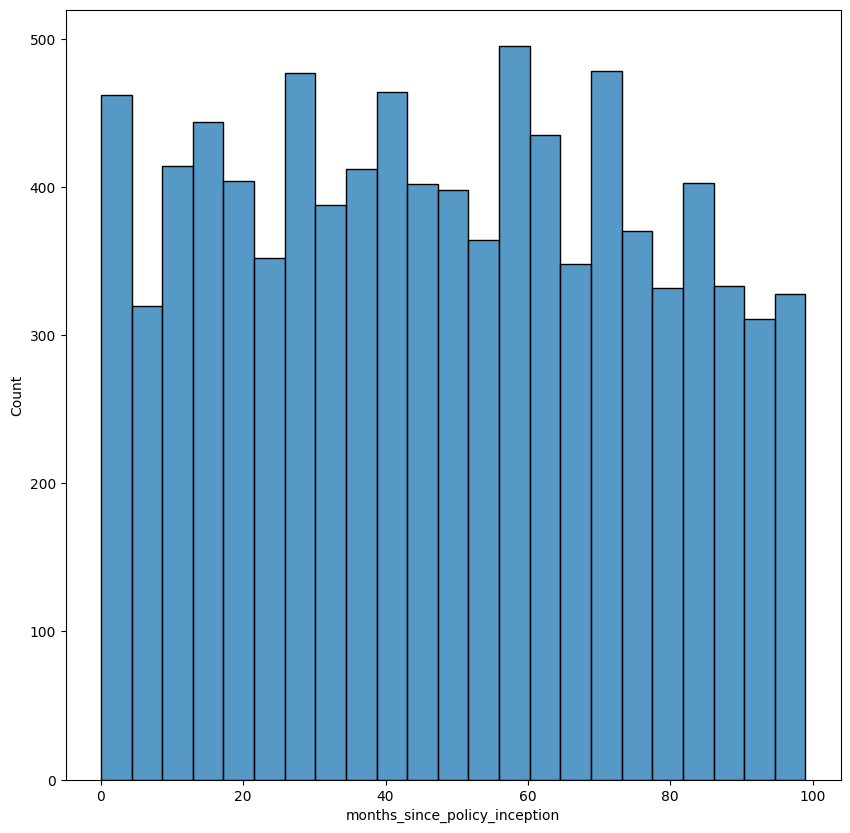

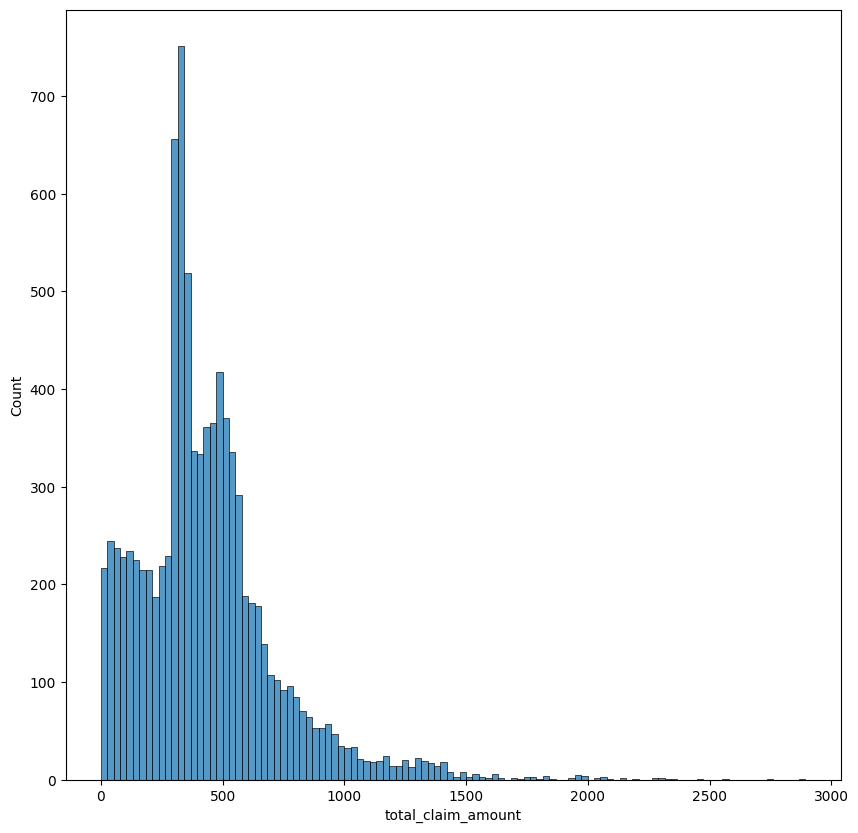

In [22]:
histogram_cont(continuous_df)

#### The histograms show that we'll need to apply transformers to the dataset.

### Looking for outliers in continuous variables

In [23]:
def box_hist_plots(df:pd.DataFrame):
    """
    Graphs a boxplot and histogram for each column in the dataframe
    """
    df_temp = df.copy()
    for col in df_temp.columns:
        fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        sns.boxplot(data=df_temp, x=col, ax=ax_box)
        sns.histplot(data=df_temp, x=col, ax=ax_hist)
        plt.show()

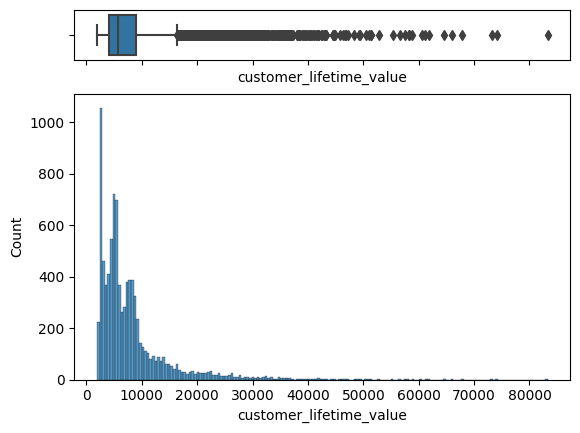

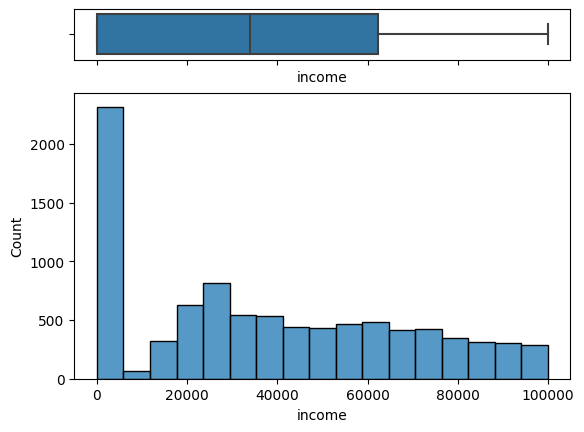

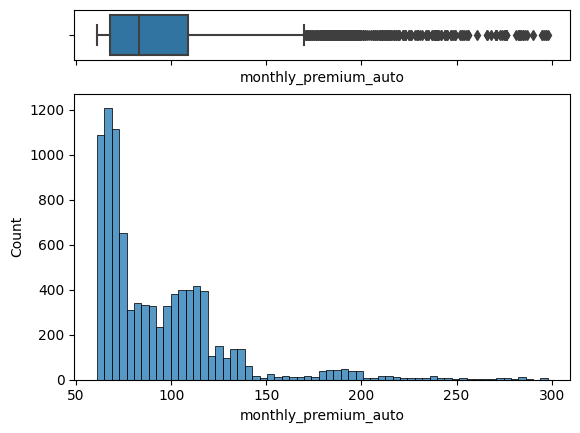

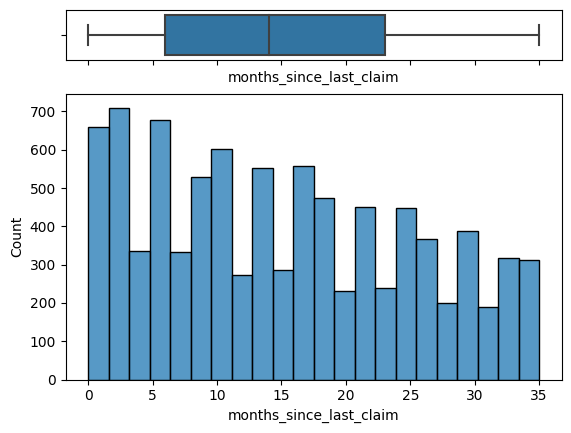

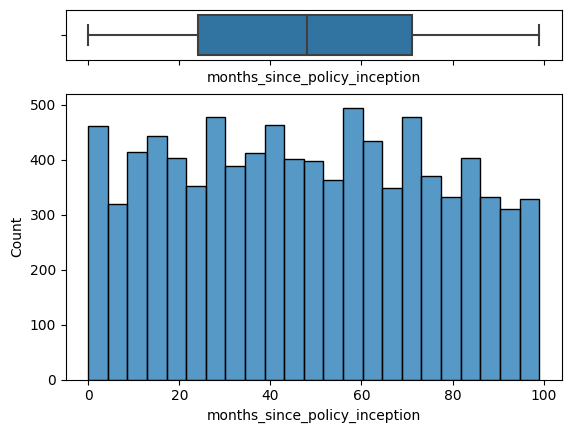

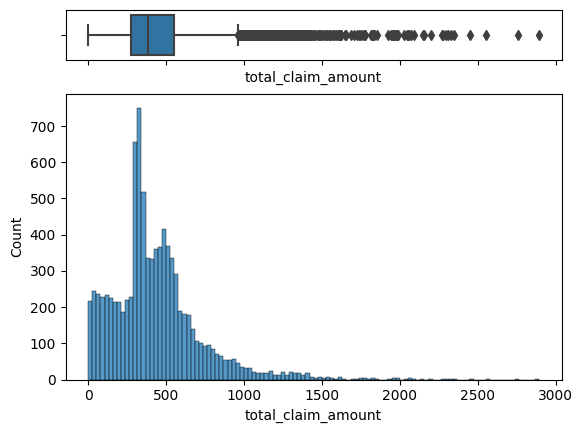

In [24]:
box_hist_plots(continuous_df)

### `customer_lifetime_value` and `total_claim_amount` have outliers according to the boxplot.

# Lab | Cleaning Categorical Data

In [25]:
#refresher on the cat columns
customer_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   state              9134 non-null   object        
 1   response           9134 non-null   object        
 2   coverage           9134 non-null   object        
 3   education          9134 non-null   object        
 4   effective_to_date  9134 non-null   datetime64[ns]
 5   employmentstatus   9134 non-null   object        
 6   gender             9134 non-null   object        
 7   location_code      9134 non-null   object        
 8   marital_status     9134 non-null   object        
 9   policy_type        9134 non-null   object        
 10  policy             9134 non-null   object        
 11  renew_offer_type   9134 non-null   object        
 12  sales_channel      9134 non-null   object        
 13  vehicle_class      9134 non-null   object        
 14  vehicle_

## Plotting categorical values

In [26]:
def categorical_catplot(df:pd.DataFrame):
    """
    Creates a count plot of each categorical column
    """

    df_temp = df.copy()
    cat_cols = df_temp.select_dtypes('object').columns.tolist()
    for col in cat_cols:
        if df_temp[col].nunique()>5:
            fig, ax = plt.subplots()
            sns.countplot(data=df_temp, y=col, order= df_temp[col].value_counts(dropna=False).index)
            plt.show()

        else:
            fig, ax = plt.subplots()
            sns.countplot(data=df_temp, x=col, order= df_temp[col].value_counts(dropna=False).index)
            plt.show()

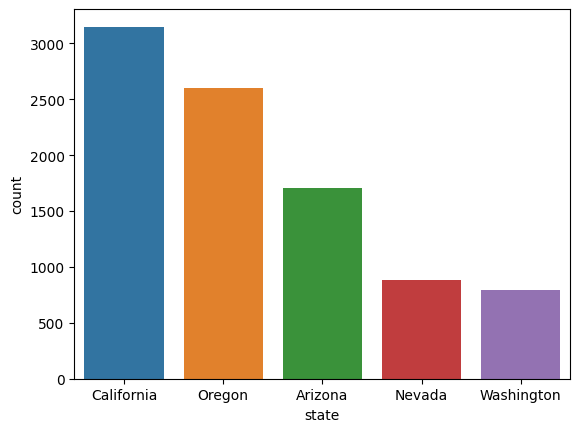

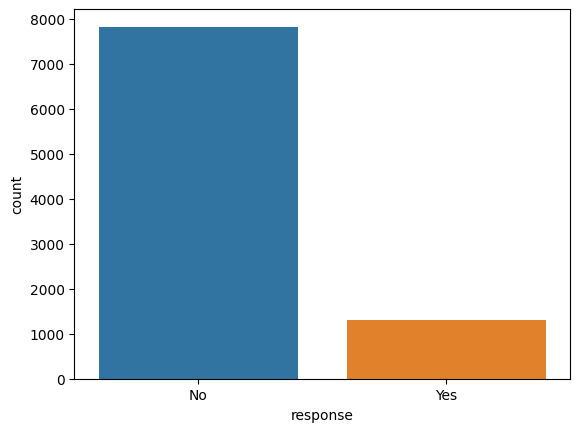

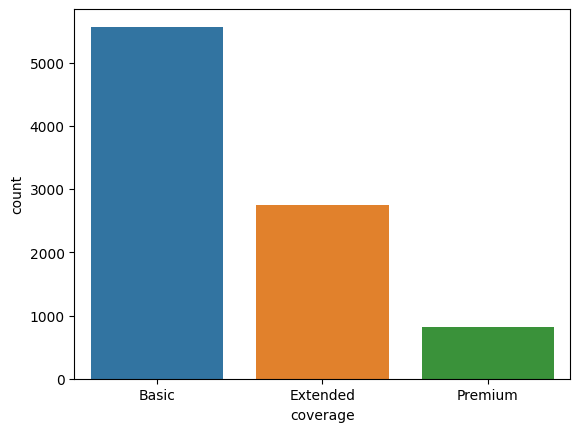

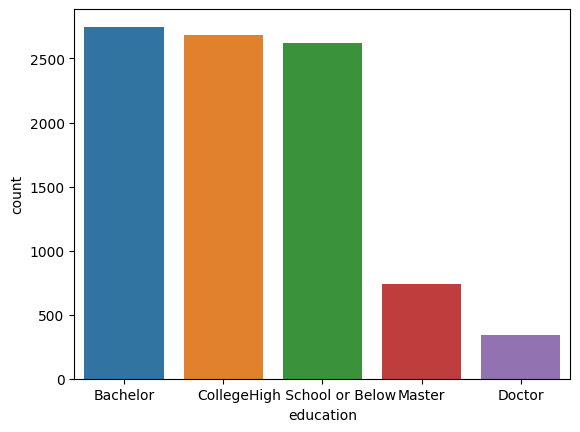

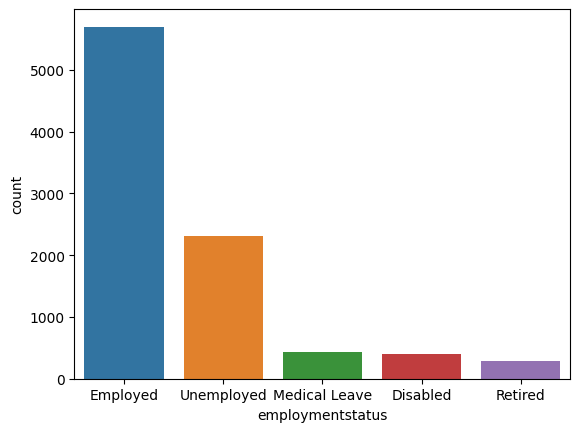

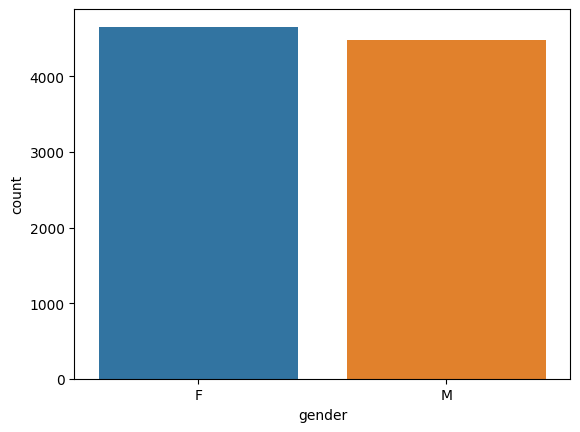

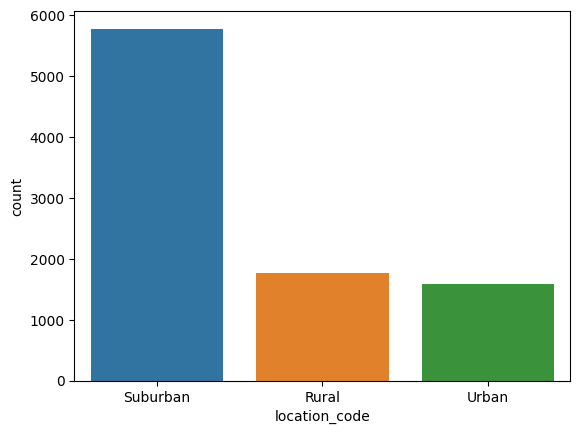

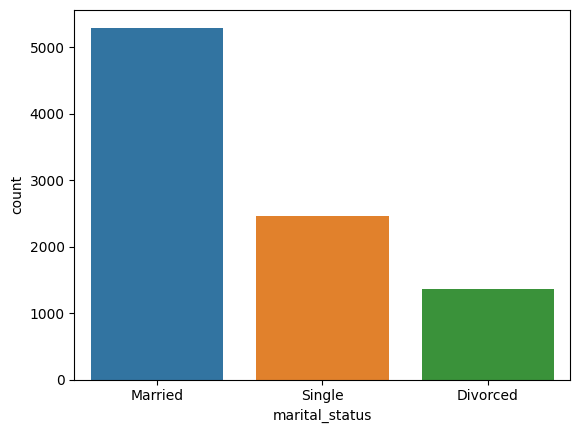

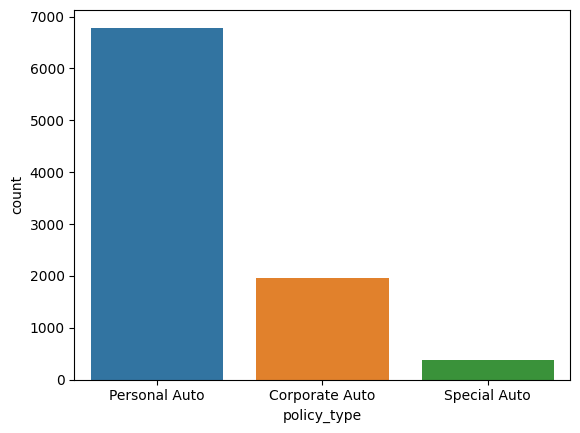

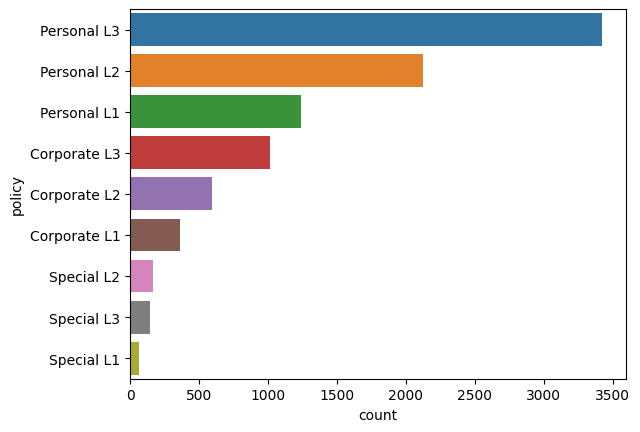

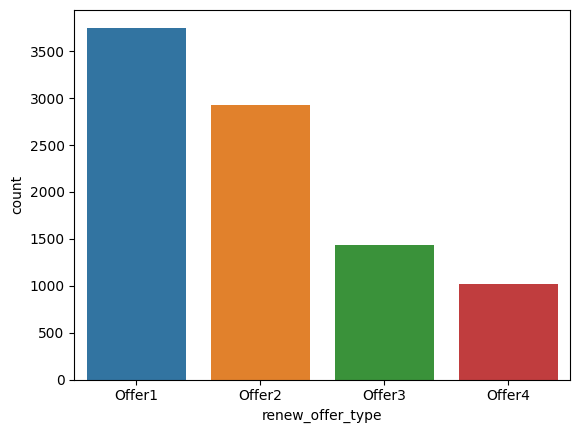

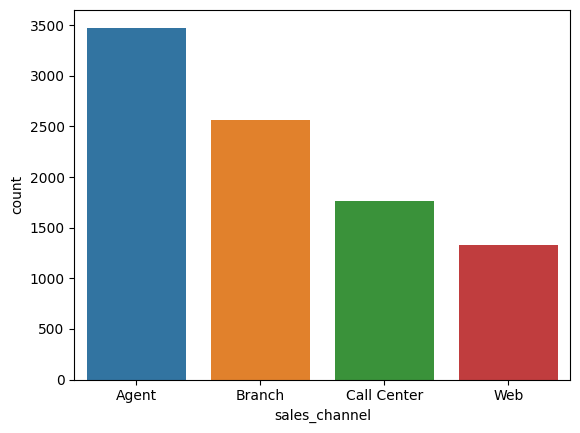

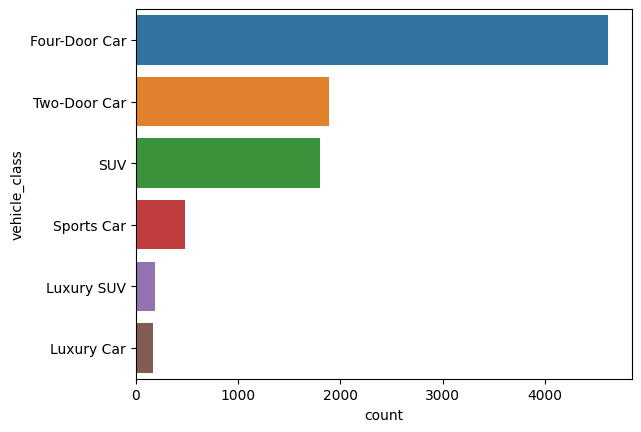

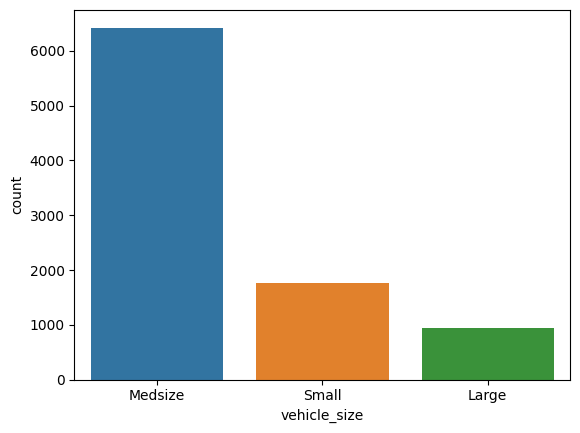

In [27]:
categorical_catplot(customer_cat)

## Cleaning `policy_type` and `policy`

In [28]:
#drop policy_type col - it is redundant
customer_cat.drop(['policy_type'], axis=1, inplace=True)

In [29]:
#clean policy column
def clean_policy(value: str) -> str:

    if ('L1' in value):
        return 'L1'
    elif ('L2' in value):
        return 'L2'
    else:
        return 'L3'

customer_cat["policy"] = customer_cat["policy"].apply(clean_policy)

In [30]:
customer_cat.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize


## Time dependency analysis - looking at claims by effective_to_date

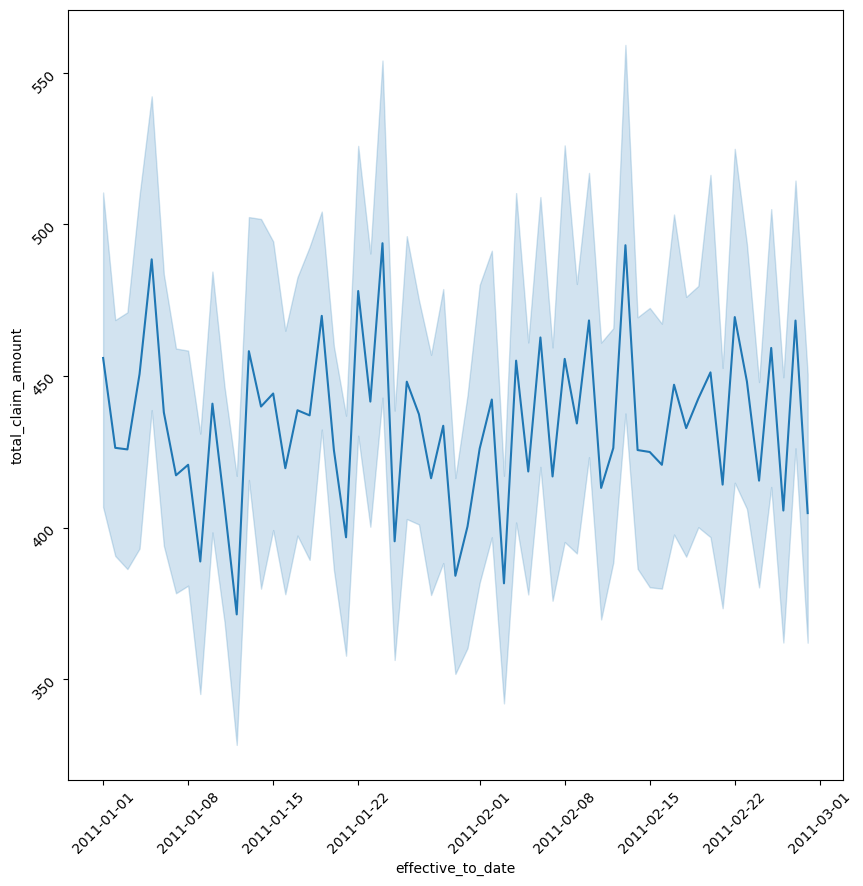

In [31]:
#plotting effective_to_date
fig,ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=customer_df, x='effective_to_date', y='total_claim_amount')
ax.tick_params(labelrotation=45)
plt.show()

In [32]:
customer_df['effective_to_date'].min()

Timestamp('2011-01-01 00:00:00')

In [33]:
customer_df['effective_to_date'].max()

Timestamp('2011-02-28 00:00:00')

In [34]:
#getting day number, day name, week number and month number from the effective_to_date column in a new dataframe
dates = pd.DataFrame()
dates['day'] = customer_df['effective_to_date'].dt.weekday
dates['day_name'] = customer_df['effective_to_date'].dt.day_name()
dates['week']= customer_df['effective_to_date'].dt.isocalendar().week
dates['month']= customer_df['effective_to_date'].dt.month
dates['total_claim_amount'] = customer_df['total_claim_amount']
dates.head()

,day,day_name,week,month,total_claim_amount
0,3,Thursday,8,2,384.811147
1,0,Monday,5,1,1131.464935
2,5,Saturday,7,2,566.472247
3,3,Thursday,3,1,529.881344
4,3,Thursday,5,2,138.130879


### Sum of `total_claim_amount` by day of week

In [35]:
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_name = dates.groupby('day_name')['total_claim_amount'].sum().round(2).reindex(index=list_of_correct_days)
day_name

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

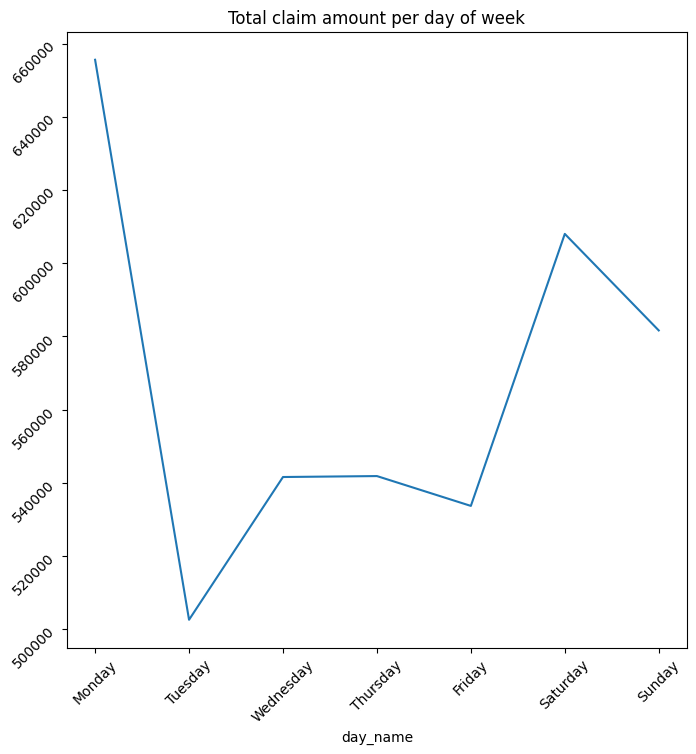

In [36]:
fig,ax = plt.subplots(figsize=(8,8))
sns.lineplot(x=day_name.index, y=day_name.values).set_title('Total claim amount per day of week')
ax.tick_params(labelrotation=45)
plt.show()

### Number of claims by day of week

In [37]:
day_count = dates.groupby('day_name')['total_claim_amount'].count().reindex(index=list_of_correct_days)
day_count

day_name
Monday       1530
Tuesday      1162
Wednesday    1221
Thursday     1249
Friday       1245
Saturday     1397
Sunday       1330
Name: total_claim_amount, dtype: int64

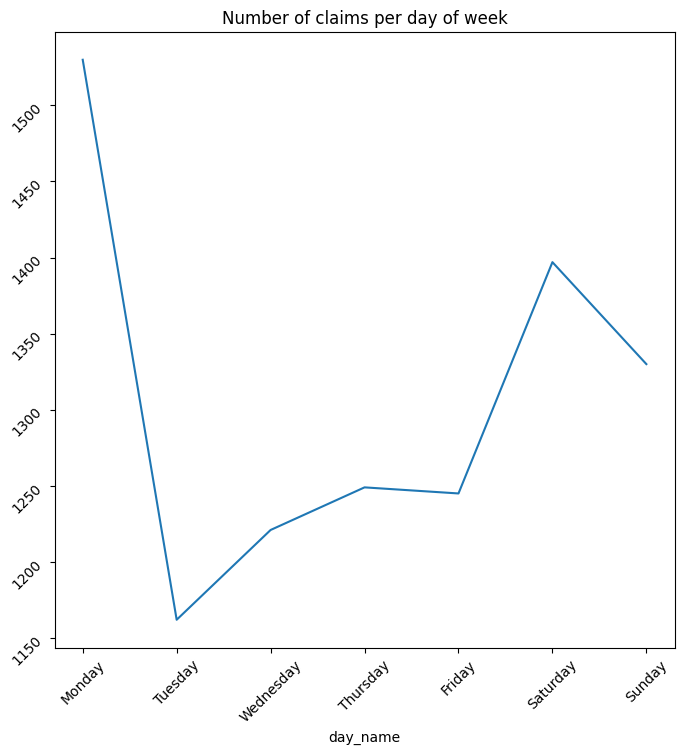

In [38]:
fig,ax = plt.subplots(figsize=(8,8))
sns.lineplot(x=day_count.index, y=day_count.values).set_title('Number of claims per day of week')
ax.tick_params(labelrotation=45)
plt.show()

The shape of the total claim amount graph and the number of claims graph is very similar. This suggests that the value of each claim is roughly the same.

### The median `total_claim_amount` by day of week

In [39]:
day_median = dates.groupby('day_name')['total_claim_amount'].median().round(2).sort_values(ascending=False)
day_median

day_name
Thursday     395.33
Wednesday    392.24
Monday       385.74
Sunday       383.72
Saturday     379.20
Tuesday      378.49
Friday       371.80
Name: total_claim_amount, dtype: float64

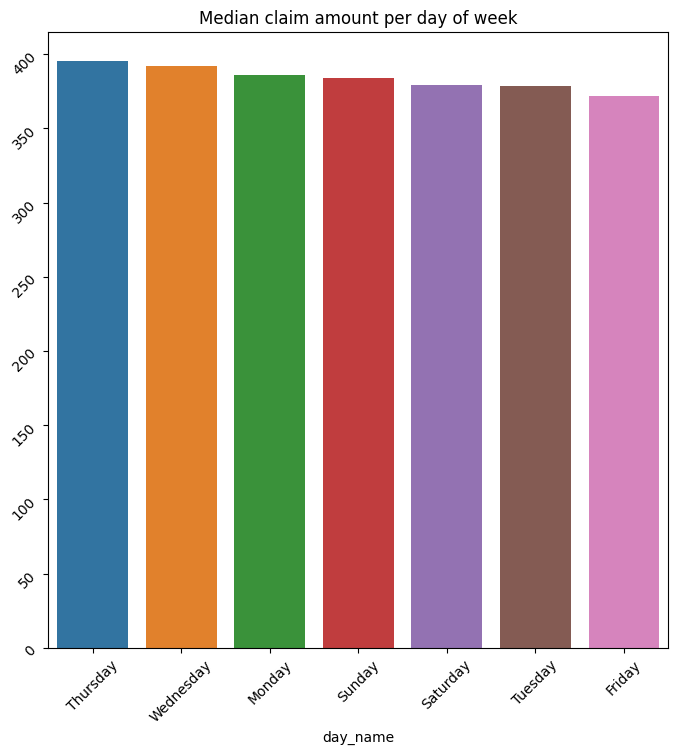

In [40]:
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x=day_median.index, y=day_median.values).set_title('Median claim amount per day of week')
ax.tick_params(labelrotation=45)
plt.show()

The median value for each day of the week is very similar. Although we see a high number of claims and total claim amount for Monday and Saturday, the median value for the claim is relatively constant.

A monthly analysis is possible, however we only have two months worth of data, so aggregating at this level would not yield many insights.

## Removing outliers from numerical columns

In [41]:
def remove_outliers(df:pd.DataFrame, thr: int=3)->pd.DataFrame:
    """
    This function checks each column of a given Pandas DataFrame, computes the z-score
    of every value, and flags the value as "outlier" if it's values is outside the
    [-3,3] range. Then the outliers are removed.

    Input:
    df: Pandas DataFrame with only numeric columns
    thr: threshold value for the number of standard deviations for a value to be considered an outlier

    Output:
    Pandas DataFrame without the outliers
    """

    df_temp = df.copy()
    columns = df_temp.columns.tolist()

    for col in columns:
        outliers = []
        
        df_temp['abs-z-score'] = np.abs((df_temp[col] - df_temp[col].mean()) / df_temp[col].std(ddof=1))
    
        outliers = df_temp[df_temp['abs-z-score'] > thr].index.tolist() #all row indices that are outside the bounds
    
        df_temp = df_temp.drop(outliers)
    
    df_temp.drop('abs-z-score', axis = 1, inplace=True)

    return df_temp
    

In [42]:
continuous_clean_df = remove_outliers(continuous_df)

## Concatenating continuous, discrete, categorical and date data

In [43]:
data_clean = pd.concat([continuous_clean_df, discrete_df, customer_cat], axis=1)
data_clean.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,number_of_open_complaints,number_of_policies,state,response,...,effective_to_date,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274.0,69.0,32.0,5.0,384.811147,0,1,Washington,No,...,2011-02-24,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0.0,94.0,13.0,42.0,1131.464935,0,8,Arizona,No,...,2011-01-31,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,12887.431650,48767.0,108.0,18.0,38.0,566.472247,0,2,Nevada,No,...,2011-02-19,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,7645.861827,0.0,106.0,18.0,65.0,529.881344,0,7,California,No,...,2011-01-20,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,2813.692575,43836.0,73.0,12.0,44.0,138.130879,0,1,Washington,No,...,2011-02-03,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize


In [44]:
data_clean.dropna(inplace=True, ignore_index=True)

### Reordering columns

In [45]:
#reordering columns
#pop column
move_col = data_clean.pop('total_claim_amount')
#insert column at end
data_clean.insert(len(data_clean.columns), 'total_claim_amount', move_col)

data_clean.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state,response,coverage,...,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount
0,2763.519279,56274.0,69.0,32.0,5.0,0,1,Washington,No,Basic,...,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,6979.535903,0.0,94.0,13.0,42.0,0,8,Arizona,No,Extended,...,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,12887.431650,48767.0,108.0,18.0,38.0,0,2,Nevada,No,Premium,...,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,7645.861827,0.0,106.0,18.0,65.0,0,7,California,No,Basic,...,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,529.881344
4,2813.692575,43836.0,73.0,12.0,44.0,0,1,Washington,No,Basic,...,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,138.130879


## Turn `response` values to 1 and 0

In [46]:
data_clean['response'] = data_clean['response'].apply(lambda x: 1 if x == 'Yes' else 0)

## Reducing class imbalance in `education`, `employmentstatus`

In [47]:
data_clean['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [48]:
data_clean['education'] = data_clean['education'].apply(lambda x: 'Graduate' if x in ('Master', 'Doctor') else x)
data_clean['education'].unique()

array(['Bachelor', 'College', 'Graduate', 'High School or Below'],
      dtype=object)

In [49]:
data_clean['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [50]:
data_clean['employmentstatus'] = data_clean['employmentstatus'].apply(lambda x: 'Inactive' if x in ('Medical Leave', 'Disabled', 'Retired') else x)
data_clean['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

## Turn `gender` values to 1 and 0

In [51]:
data_clean['gender'].unique()

array(['F', 'M'], dtype=object)

In [52]:
data_clean['gender'] = data_clean['gender'].apply(lambda x: 1 if x == 'F' else 0)

In [53]:
data_clean['gender'].unique()

array([1, 0])

## Grouping `vehicle_class`

In [54]:
data_clean['vehicle_class'] = data_clean['vehicle_class'].apply(lambda x: 'Luxury' if x in ('Sports Car', 'Luxury SUV', 'Luxury Car') else x)

In [55]:
data_clean['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

## Preparing categorical ordinal columns

In [56]:
ordinal_mapper = {
    'coverage':{'Basic':1, 'Extended':2, 'Premium':3},
    'employmentstatus':{'Unemployed':1, 'Inactive':2, 'Employed':3},
    'location_code':{'Rural':1, 'Suburban':2, 'Urban':3},
    'vehicle_size':{'Small':1, 'Medsize':2, 'Large':3}
}

In [57]:
def ordinal_mapping(df:pd.DataFrame, mapper:dict)->pd.DataFrame:
    
    df_temp = df.copy()
    
    for key in mapper:
        df_temp[key].replace(mapper[key], inplace=True)

    return df_temp
    

In [58]:
data_clean = ordinal_mapping(data_clean, ordinal_mapper)

In [59]:
for key in ordinal_mapper:
    print(data_clean[key].unique())

[1 2 3]
[3 1 2]
[2 1 3]
[2 1 3]


### Separating nominal columns

In [60]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8575 entries, 0 to 8574
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_lifetime_value        8575 non-null   float64       
 1   income                         8575 non-null   float64       
 2   monthly_premium_auto           8575 non-null   float64       
 3   months_since_last_claim        8575 non-null   float64       
 4   months_since_policy_inception  8575 non-null   float64       
 5   number_of_open_complaints      8575 non-null   int64         
 6   number_of_policies             8575 non-null   int64         
 7   state                          8575 non-null   object        
 8   response                       8575 non-null   int64         
 9   coverage                       8575 non-null   int64         
 10  education                      8575 non-null   object        
 11  effective_to_date

In [61]:
data_clean.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state,response,coverage,...,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount
0,2763.519279,56274.0,69.0,32.0,5.0,0,1,Washington,0,1,...,3,1,2,Married,L3,Offer1,Agent,Two-Door Car,2,384.811147
1,6979.535903,0.0,94.0,13.0,42.0,0,8,Arizona,0,2,...,1,1,2,Single,L3,Offer3,Agent,Four-Door Car,2,1131.464935
2,12887.431650,48767.0,108.0,18.0,38.0,0,2,Nevada,0,3,...,3,1,2,Married,L3,Offer1,Agent,Two-Door Car,2,566.472247


In [62]:
#nominal columns
nom_cols = ['state', 'response', 'education', 'gender', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']

In [63]:
data_clean_nominals = data_clean[nom_cols]

In [78]:
#get possible values in the nominal columns
levels = [np.sort(data_clean[cols].unique()).tolist() for cols in nom_cols]
levels

[['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
 [0, 1],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 [0, 1],
 ['Divorced', 'Married', 'Single'],
 ['L1', 'L2', 'L3'],
 ['Offer1', 'Offer2', 'Offer3', 'Offer4'],
 ['Agent', 'Branch', 'Call Center', 'Web'],
 ['Four-Door Car', 'Luxury', 'SUV', 'Two-Door Car']]

In [80]:
type(levels)

list

### Instantiating OneHotEncoder

In [81]:
#instantiating OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

#fit
encoder = OneHotEncoder(drop='first', categories=levels)

#transform
encoder.fit(data_clean_nominals)

OneHotEncoder(categories=[['Arizona', 'California', 'Nevada', 'Oregon',
                           'Washington'],
                          [0, 1],
                          ['Bachelor', 'College', 'Graduate',
                           'High School or Below'],
                          [0, 1], ['Divorced', 'Married', 'Single'],
                          ['L1', 'L2', 'L3'],
                          ['Offer1', 'Offer2', 'Offer3', 'Offer4'],
                          ['Agent', 'Branch', 'Call Center', 'Web'],
                          ['Four-Door Car', 'Luxury', 'SUV', 'Two-Door Car']],
              drop='first')

# Lab | Comparing regression models

## Define X and y

In [66]:
y = data_clean['total_claim_amount']
X = data_clean.drop('total_claim_amount', axis = 1)

## Separating train and test sets

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

## Separating numeric and categorical columns in X train and test

In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6002 entries, 7257 to 4818
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_lifetime_value        6002 non-null   float64       
 1   income                         6002 non-null   float64       
 2   monthly_premium_auto           6002 non-null   float64       
 3   months_since_last_claim        6002 non-null   float64       
 4   months_since_policy_inception  6002 non-null   float64       
 5   number_of_open_complaints      6002 non-null   int64         
 6   number_of_policies             6002 non-null   int64         
 7   state                          6002 non-null   object        
 8   response                       6002 non-null   int64         
 9   coverage                       6002 non-null   int64         
 10  education                      6002 non-null   object        
 11  effective_to_date  

In [99]:
#in others are the ordinal cols -- the effective_to_date column is removed
numeric_cols = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim',
                'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']

categorical_cols = ['state', 'response',
                    'education', 'gender',
                    'marital_status', 'policy',
                    'renew_offer_type', 'sales_channel',
                    'vehicle_class']

other_cols = ['coverage', 'employmentstatus', 'location_code','vehicle_size']

In [100]:
X_train_cat = X_train[categorical_cols]
X_train_num = X_train[numeric_cols]
X_train_other = X_train[other_cols]

X_test_cat = X_test[categorical_cols]
X_test_num = X_test[numeric_cols]
X_test_other = X_test[other_cols]

## Encode categoricals using OneHotEncoder from previous lab

In [101]:
#transform

X_train_cat_encoded_np = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded_np = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_np, columns=encoder.get_feature_names_out(), index=X_train_cat.index)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_np,  columns=encoder.get_feature_names_out(), index=X_test_cat.index) 

In [102]:
display(X_train_cat_encoded_df.head(3))
display(X_test_cat_encoded_df.head(3))

,state_California,state_Nevada,state_Oregon,state_Washington,response_1,education_College,education_Graduate,education_High School or Below,gender_1,marital_status_Married,...,policy_L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
7257,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5720,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,state_California,state_Nevada,state_Oregon,state_Washington,response_1,education_College,education_Graduate,education_High School or Below,gender_1,marital_status_Married,...,policy_L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
2296,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4306,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5074,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Transform the numeric columns

In [103]:
X_train_num.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000
mean,7062.141703,38122.277074,88.150117,15.062146,48.026824,0.376041,2.991503
std,4810.811187,30451.666511,25.201503,10.066880,27.838779,0.892140,2.413253
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,3843.087321,10484.000000,68.000000,6.000000,24.250000,0.000000,1.000000
50%,5555.661182,34498.000000,79.000000,14.000000,48.000000,0.000000,2.000000
75%,8543.048703,62716.750000,106.000000,23.000000,71.000000,0.000000,4.000000
max,28511.033310,99981.000000,192.000000,35.000000,99.000000,5.000000,9.000000


In [104]:
#transforming the numeric columns using PowerTransformer

from sklearn.preprocessing import PowerTransformer

#fit
transformer = PowerTransformer().fit(X_train_num)

#transform
X_train_num_transformed = transformer.transform(X_train_num)
X_test_num_transformed = transformer.transform(X_test_num)

X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns, index=X_test_num.index)

## Concating datasets

In [105]:
X_train_new = pd.concat([X_train_num_transformed_df, X_train_cat_encoded_df, X_train_other], axis = 1)
X_test_new = pd.concat([X_test_num_transformed_df, X_test_cat_encoded_df, X_test_other], axis = 1)

In [106]:
X_train_new.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,coverage,employmentstatus,location_code,vehicle_size
7257,1.254780,-1.662875,1.312075,-0.698167,-0.403151,-0.508609,-0.066679,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,1,2,2
5720,-1.502490,0.235429,-1.144354,-0.135818,1.275008,-0.508609,-1.134627,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,3,3,2
8210,-1.758357,-1.662875,-1.541686,0.245320,0.393123,-0.508609,-1.134627,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,2
3063,-0.076610,-1.662875,-0.071004,-0.036060,0.393123,1.921569,0.868793,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2,1,2,2
8478,-0.826154,0.180443,0.807702,-0.698167,0.295321,-0.508609,-1.134627,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,2,2,2


## Using MinMaxScaler on full dataset

In [107]:
from sklearn.preprocessing import MinMaxScaler

#fit
scaler = MinMaxScaler().fit(X_train_new)

#scale
X_train_new_scaled_np = scaler.transform(X_train_new)
X_test_new_scaled_np = scaler.transform(X_test_new)

X_train_new_scaled_df = pd.DataFrame(X_train_new_scaled_np, columns=X_train_new.columns, index=X_train_new.index)
X_test_new_scaled_df = pd.DataFrame(X_test_new_scaled_np, columns=X_test_new.columns, index=X_test_new.index)

## Creating a Linear regression model

In [109]:
from sklearn.linear_model import LinearRegression

#fit
lm = LinearRegression().fit(X_train_new_scaled_df, y_train)


#predict
y_train_pred = lm.predict(X_train_new_scaled_df)
y_test_pred = lm.predict(X_test_new_scaled_df)

## Evaluating error metrics

In [110]:
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    This function takes the real values and any model predictions for the Train and Test sets and returns a Pandas
    DataFrame with a summary of error metrics for the Train and Test sets like this:

    | Metric | Train | Test |
    |--------|-------|------|
    | MAE    | value | value|
    | MSE    | value | value|
    | RMSE   | value | value|
    | R2     | value | value|

    Inputs:
    y_real_train: Python list with the real values to be predicted in the Train set
    y_real_test: Python list with the real values to be predicted in the Test set
    y_pred_train: Python list with the model's predicted values in the Train set
    y_pred_test:  Python list with the model's predicted values in the Test set
    '''
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_real_test,  y_pred_test,  squared=False)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test,  y_pred_test)

    results = {"Metric": ["MAE","MSE", "RMSE", "R2"],
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

## Error report for linear model

In [112]:
error_metrics_report(list(y_train), list(y_test), list(y_train_pred), list(y_test_pred))

,Metric,Train,Test
0,MAE,118.57,119.71
1,MSE,23047.50,23763.83
2,RMSE,151.81,154.16
3,R2,0.53,0.52


## Function to train many different models

In [153]:
def train_many_models(xtrain: pd.DataFrame,
                      xtest: pd.DataFrame,
                      ytrain: pd.Series,
                      models=['LinearRegression', 'KNeighborsRegressor', 'MLPRegressor'])-> dict:
    """
    This function takes X_train, X_test, y_train and trains the models specified. It returns a dictionary
    with the model type as the key and values with the list of the y_train_prediction and list of the y_test_predictions.

    Input
    xtrain: a pandas dataframe with the X_train values
    xtest: a pandas dataframe with the X_test values
    ytrain: a pandas series with the y_train values
    models: a list with the names of models to train.

    Output
    a dictionary with model type as key and the y_train and y_test predictions
        {
        'lm': [y_train_prediction, y_train_prediction],
        'kn': [y_train_prediction, y_train_prediction],
        'mlp':[y_train_prediction, y_train_prediction]
        }
         
        

    """
    results={}
    
    for model in models:
        if model == 'LinearRegressor':
            from sklearn.linear_model import LinearRegression
            
            #fit
            lm = LinearRegression().fit(xtrain, ytrain)
            
            
            #predict
            y_train_pred = lm.predict(xtrain)
            y_test_pred = lm.predict(xtest)

            results[model]=[list(y_train_pred), list(y_test_pred)]
            print('Training {} model'.format(model))

        if model == 'KNeighborsRegressor':
            from sklearn.neighbors import KNeighborsRegressor

            #fit
            kn = KNeighborsRegressor().fit(xtrain, ytrain)

            #predict
            y_train_pred = kn.predict(xtrain)
            y_test_pred = kn.predict(xtest)

            results[model]=[list(y_train_pred), list(y_test_pred)]
            print('Training {} model'.format(model))

        if model == 'MLPRegressor':
            from sklearn.neural_network import MLPRegressor
            #fit
            mlp = MLPRegressor().fit(xtrain,ytrain)

            #predict
            y_train_pred = mlp.predict(xtrain)
            y_test_pred = mlp.predict(xtest)

            results[model]=[list(y_train_pred), list(y_test_pred)]
            print('Training {} model'.format(model))

    return results
    

In [154]:
models = ['LinearRegressor', 'KNeighborsRegressor', 'MLPRegressor']
results = train_many_models(X_train_new_scaled_df, X_test_new_scaled_df, y_train, models)

Training LinearRegressor model
Training KNeighborsRegressor model
Training MLPRegressor model


/Users/deborahhaar/Desktop/ironhack-work/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Model results

In [157]:
for model in models:
    print('Error metrics for {} model'.format(model))
    display(error_metrics_report(y_train, y_test, results[model][0], results[model][1]))

Error metrics for LinearRegressor model


,Metric,Train,Test
0,MAE,118.57,119.71
1,MSE,23047.50,23763.83
2,RMSE,151.81,154.16
3,R2,0.53,0.52


Error metrics for KNeighborsRegressor model


,Metric,Train,Test
0,MAE,101.84,127.51
1,MSE,18859.64,29529.53
2,RMSE,137.33,171.84
3,R2,0.62,0.40


Error metrics for MLPRegressor model


,Metric,Train,Test
0,MAE,110.41,110.89
1,MSE,20633.87,21092.48
2,RMSE,143.64,145.23
3,R2,0.58,0.57


In [152]:
error_metrics_report(y_train, y_test, results['mlp'][0], results['mlp'][1])

,Metric,Train,Test
0,MAE,108.80,109.53
1,MSE,20168.00,20661.73
2,RMSE,142.01,143.74
3,R2,0.59,0.58


The MLPRegressor model returns the best R2 score for the test set.